## Assignment 2 - Supervised Learning flow

### Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [20]:
# student 1: Roy Dadon 5714
# student 2: Sahar Aviad 5843
# student 3: Gil Yona 8017
# student 4: David Saadia 3401
# (optional) student 5:
# (optional) student 6:

### Feature Explanation Block

In [21]:
# Embarked - Entry location to the ship - we can assume theres no order.
# Pclass - First class/ Business class etc.
# SibSp - Number of siblings / partners
# Parch - Number of parents or kids
# Fare - Ticket cost

### Imports of libraries 

In [22]:
#IMPORTS -----------
# -Necessities- 
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline


#  -- Grading Models --
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


# -- Models --
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.naive_bayes import MultinomialNB as NaiveBayes
from sklearn.tree import DecisionTreeClassifier as DecisionTree
from sklearn.ensemble import GradientBoostingClassifier as GradientBoost
from sklearn.neural_network import MLPClassifier as NeuralNetwork

# -- Cross Validation and Preprocessing --
from sklearn.model_selection import StratifiedKFold as cross_val, GridSearchCV, KFold
from sklearn.feature_selection import SelectKBest as select_k_best, VarianceThreshold 

# -- Scalers --
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# -- Visualzation --
import matplotlib.pyplot as plt
import seaborn as sns


#### Loading the dataset

In [23]:
titanic_train = pd.read_csv("titanic_train.csv")
titanic_test = pd.read_csv("titanic_test.csv")
label = "Survived"

In [24]:
print("Train set shape:", titanic_train.shape, "\nTest set shape:",titanic_test.shape)

Train set shape: (712, 8) 
Test set shape: (179, 8)


#### Small peek into the dataset

In [25]:
titanic_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,0,54.0,1,0,78.2667,1,1
1,2,0,45.0,0,0,13.5000,0,1
2,3,1,20.0,0,0,9.5000,0,0
3,3,1,36.0,0,0,7.8958,0,0
4,3,1,22.0,0,0,8.0500,0,0


In [26]:
titanic_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,35.000000,0,0,7.0500,0,0
1,3,1,30.000000,0,0,7.2500,0,0
2,3,1,29.699118,0,0,14.5000,0,0
3,3,0,21.000000,0,0,7.7500,2,0
4,3,1,32.000000,0,0,56.4958,0,1


### Statisitcal view of the dataset

In [27]:
titanic_train.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,2.294944,0.640449,29.531213,0.528090,0.384831,32.379429,0.372191,0.394663
std,0.841990,0.480206,13.188028,1.055052,0.803085,49.836074,0.649970,0.489122
min,1.000000,0.000000,0.670000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.750000,0.000000,22.000000,0.000000,0.000000,7.925000,0.000000,0.000000
50%,3.000000,1.000000,29.699118,0.000000,0.000000,14.500000,0.000000,0.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,1.000000,1.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000,1.000000


## Correlations and Visualisation
### Examining all correlations with the target label


In [28]:
X = titanic_train.copy().drop(labels = label, axis = 1)
y = titanic_train.copy()[label]

correlation = X.corrwith(y, axis = 0)
correlation


Pclass     -0.324024
Sex        -0.550699
Age        -0.072729
SibSp      -0.031052
Parch       0.074699
Fare        0.264345
Embarked    0.099162
dtype: float64

### Exhibit the two most correlated features

In [29]:
correlation = correlation.sort_values(ascending = False, key = lambda x: np.abs(x)).head(2)

correlation_pd = pd.DataFrame(correlation).T
correlation_pd.index = [label]
correlation_pd

,Sex,Pclass
Survived,-0.550699,-0.324024


In [30]:
dfGenderCount = pd.DataFrame(titanic_train.value_counts(subset = ["Sex", label]))
dfGenderCount

,,count
Sex,Survived,
1,0,368
0,1,193
1,1,88
0,0,63


In [31]:
genderCountList = list(dfGenderCount["count"])
# Gender - 0 : Female, 1 : Male
genderCountList[1] , genderCountList[2] = genderCountList[2] , genderCountList[1]
print(genderCountList)

[368, 88, 193, 63]


### Correlation heatmap between features in the dataframe

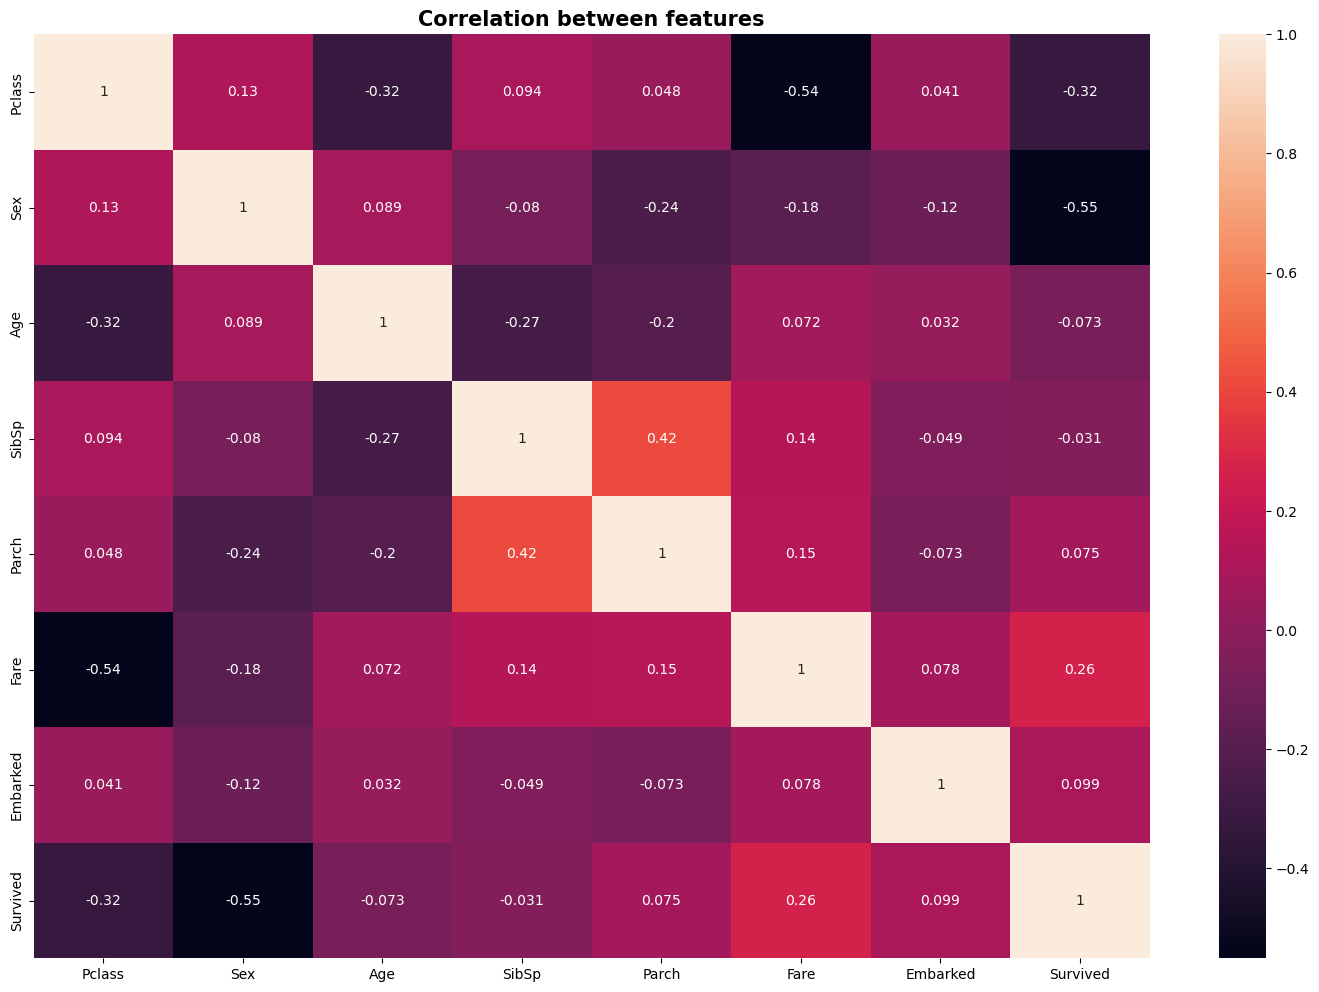

In [32]:
plt.figure(figsize = (18,12))
sns.heatmap(titanic_train.corr(), annot = True)
plt.title("Correlation between features", fontweight = "bold", fontsize=15)
plt.show()

### Survival distrubtion by gender

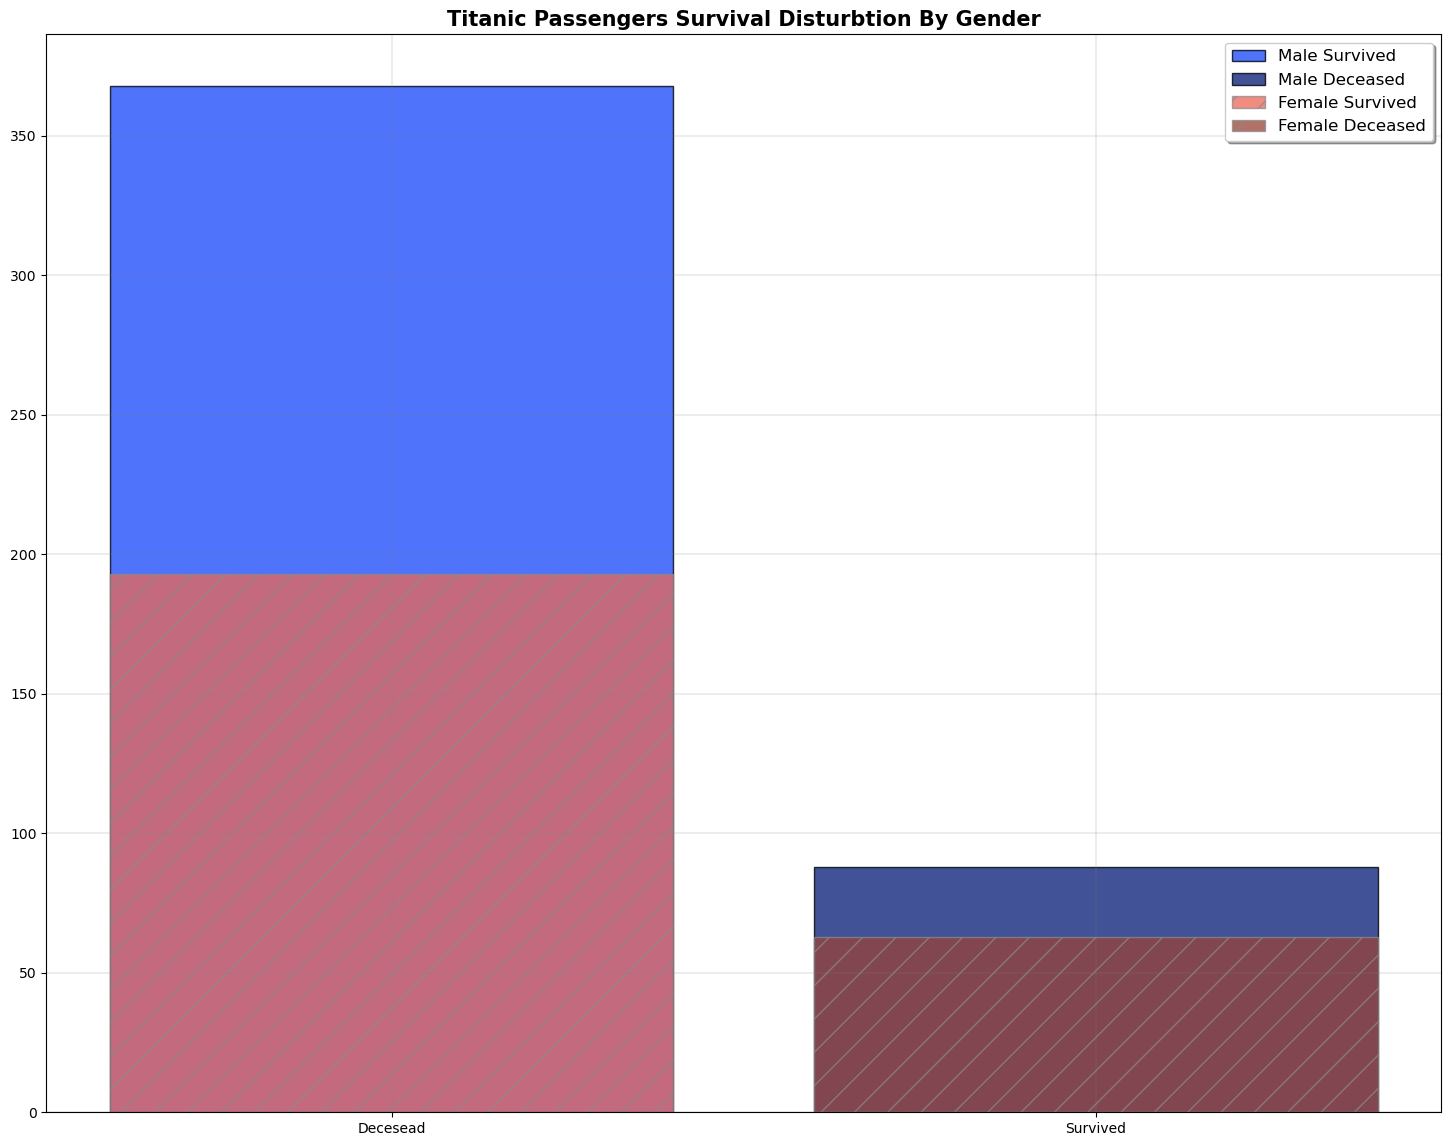

In [33]:
plt.figure(figsize=(18,14))

malestats= plt.bar(["Decesead", "Survived"], [genderCountList[0],genderCountList[1]],label=["Male Survived","Male Deceased"], color = ["#2450fb","#11277d"], alpha= 0.8, edgecolor="black", width=0.8)
femalestats= plt.bar(["Decesead", "Survived"], [genderCountList[2],genderCountList[3]],label= ["Female Survived","Female Deceased"], color = ["#ec6756","#994338"], hatch="/", alpha = 0.75, edgecolor="#8a8a8a", width=0.8)
plt.title("Titanic Passengers Survival Disturbtion By Gender", fontsize=15, fontweight="bold")
plt.grid(which="both", color="grey", linewidth=0.2)
plt.legend(["Male Survived","Male Deceased","Female Survived","Female Deceased"], shadow=True, fontsize=12)


### Survival distribution by age density plot


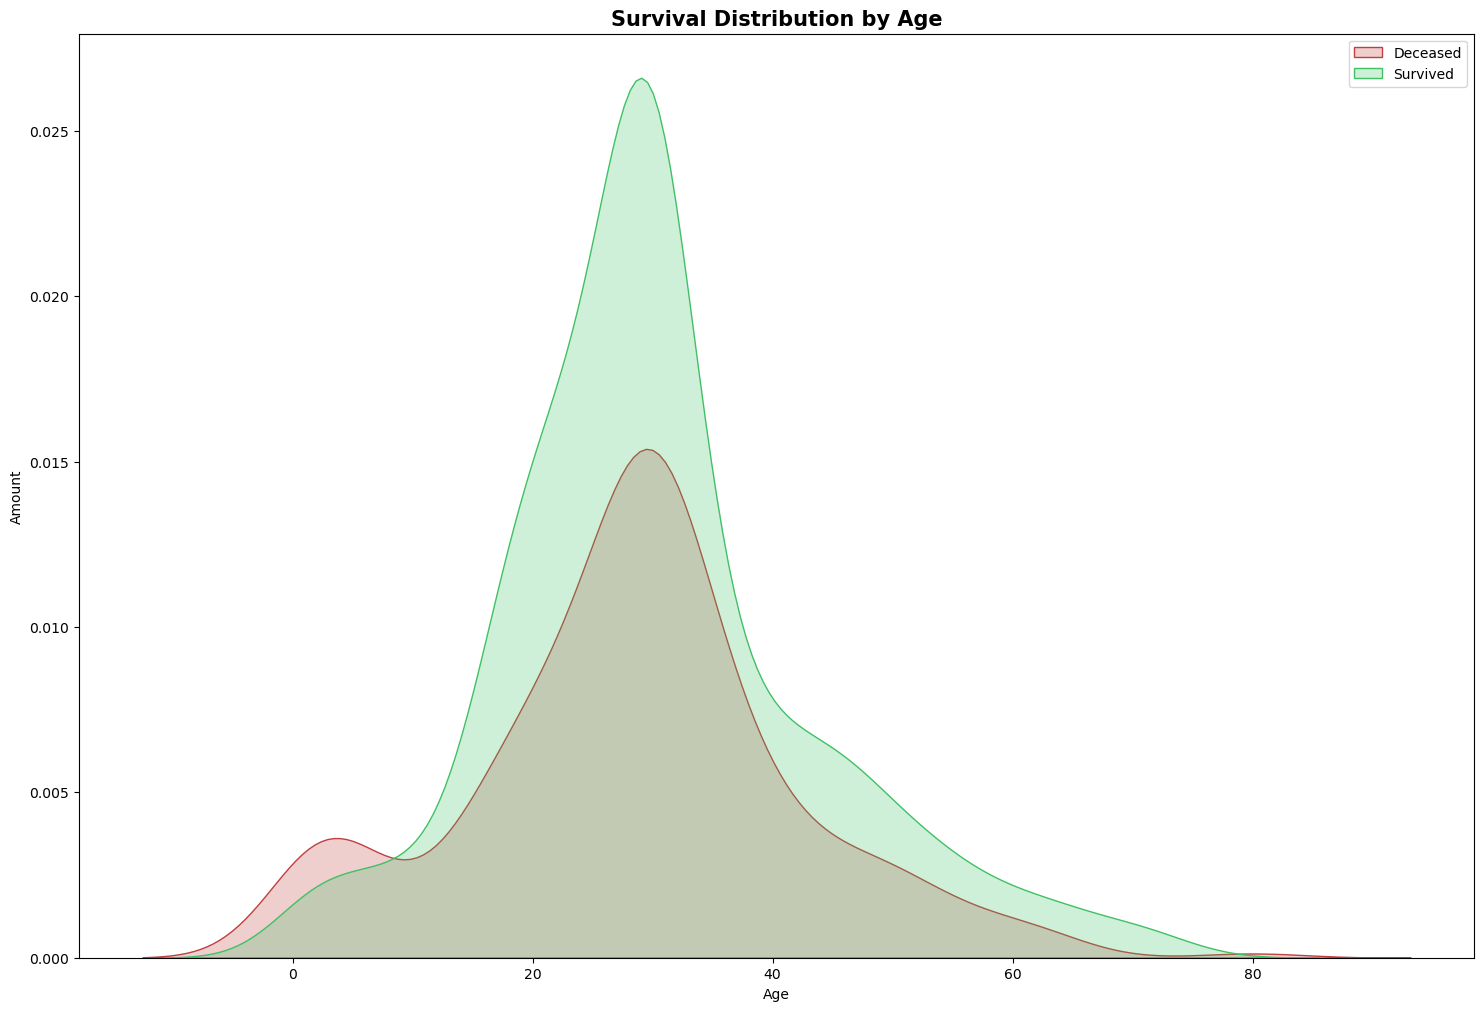

In [34]:
plt.figure(figsize = (18,12))
df2 = titanic_train[[label, "Age"]]

k = sns.kdeplot(data = df2, x = "Age", hue = "Survived", palette = ["#3fc164","#c13f3f"], fill = True)
k.legend(labels = ["Deceased", "Survived"])
plt.xlabel("Age")
plt.ylabel("Amount")
plt.title("Survival Distribution by Age", fontweight = "bold", fontsize=15)
plt.show()


### Survival distrubtion by fare price

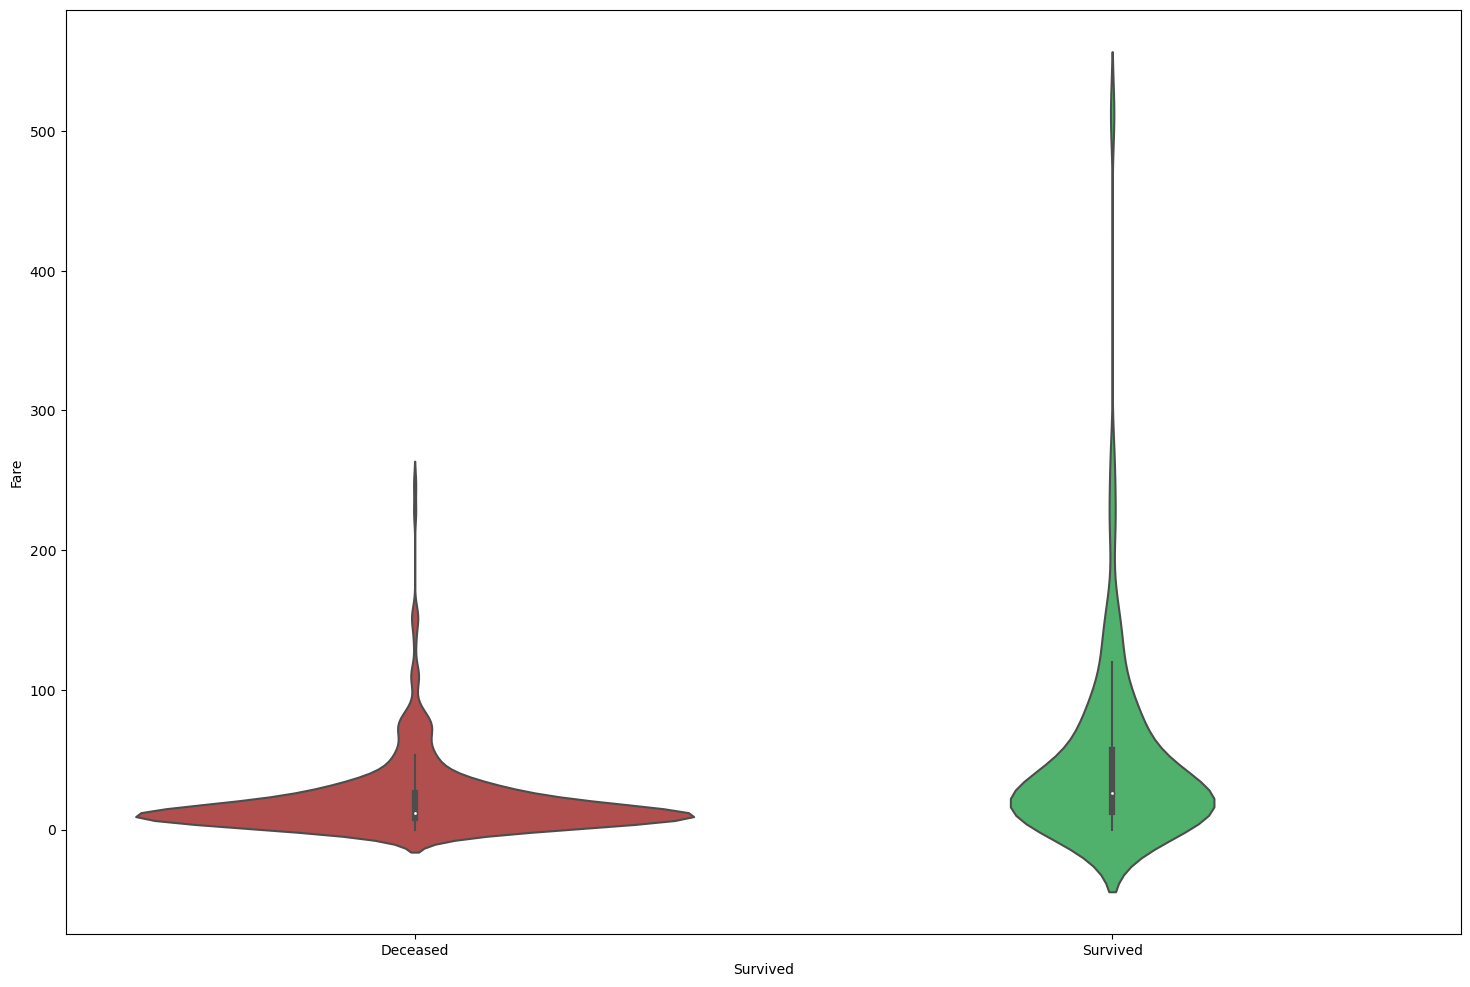

In [35]:
plt.figure(figsize=(18,12))
Violin= sns.violinplot(x="Survived", y="Fare", data=titanic_train, palette = ["#c13f3f", "#3fc164"])
xlabels = ["Deceased", "Survived"]
Violin.set(xticklabels=xlabels)
plt.show()

### Survival distrubtion by class

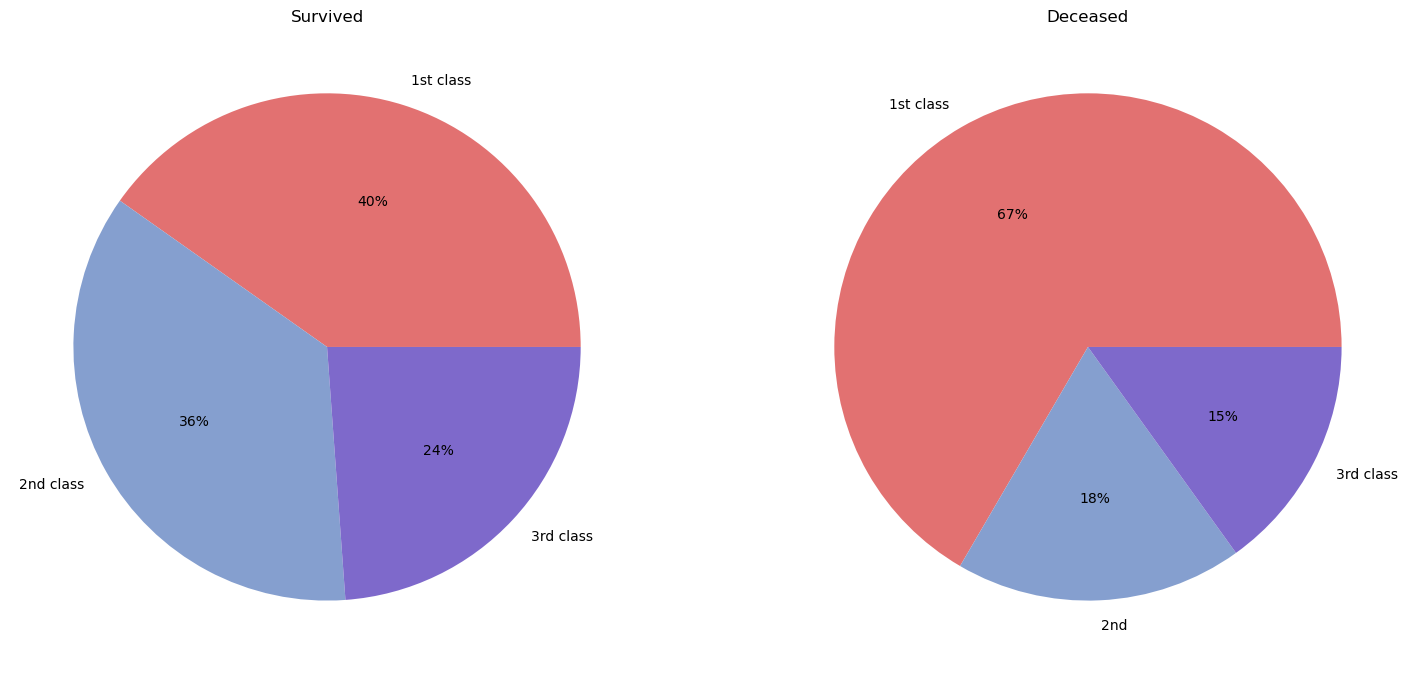

In [36]:
fig, ax = plt.subplots(1,2, figsize = (18,12))

pallete_color= ["#e27171", "#859fcf", "#7e69cb"]	
surved = titanic_train[titanic_train[label] == 1]
notSurved = titanic_train[titanic_train[label] == 0]
ax[0].pie(surved["Pclass"].value_counts(), labels = ["1st class", "2nd class", "3rd class"], colors = pallete_color, autopct='%.0f%%') #autopct is anotate
ax[1].pie(notSurved["Pclass"].value_counts(), labels = ["1st class", "2nd", "3rd class"], colors = pallete_color, autopct='%.0f%%') #autopct is anotate
ax[0].set_title("Survived")
ax[1].set_title("Deceased")
plt.show()

## Permutation Options 
* Specifing which models, scalers and feature selection techniques we want to test for
* Specifing which data options we send to each hyper-parameter for the models, and feature selection techniques

In [37]:

models = [KNN(), NaiveBayes(), DecisionTree(), GradientBoost(),NeuralNetwork(max_iter = 2000)]
scalers = [StandardScaler(), MinMaxScaler()]

#Specifing which data we send to each parameter
#Correlation:
highest_corr= list(range( 2, 5+1 )) + ["all"] 
thresholds= [0.001,0.01, 0.1]

#KNN parameters:
KNN_k = list(range( 1 ,7+1))
KNN_weight= ["uniform", "distance"]
KNN_metric = ["manhattan", "euclidean","minkowski"]

#Naive Bayes parameters:
NB_alpha =  [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
NB_boolean = [True,False]

#Decision Tree parameters:
DT_criterion = ["gini", "entropy"]

#Neural Network parameters:
NN_hiddenLayerSizes = [(15,5),(3,5),(5,5,5),(5,3,5,3)]
NN_activation = ["tanh", "relu"]



#Greadient Boost parameters:
GB_nEstimators = [5,150,400]
GB_learnRate = [0.09, 0.01, 0.2]
GB_maxDepth = [3,5,7]
GB_loss = ["log_loss", "exponential"]


## Baseline
#### Before testing all of the possible permutations, it is important to determine a baseline for the classification models. 

In [38]:
train_copy = titanic_train.copy()
test_copy = titanic_test.copy()
BaseLineScores = []

for model in models:
    model.fit(train_copy.drop(label, axis = 1), train_copy[label])
    y_pred = model.predict(test_copy.drop(label, axis = 1))
    baseline_f1 = f1_score(test_copy[label], y_pred)
    BaseLineScores.append((str(model),baseline_f1))
    print("Estimated baseline f1 score for " + str(model) + " is: " , baseline_f1)



Estimated baseline f1 score for KNeighborsClassifier() is:  0.4955752212389381
Estimated baseline f1 score for MultinomialNB() is:  0.5242718446601943
Estimated baseline f1 score for DecisionTreeClassifier() is:  0.7692307692307692
Estimated baseline f1 score for GradientBoostingClassifier() is:  0.7857142857142857
Estimated baseline f1 score for MLPClassifier(max_iter=2000) is:  0.7226890756302522


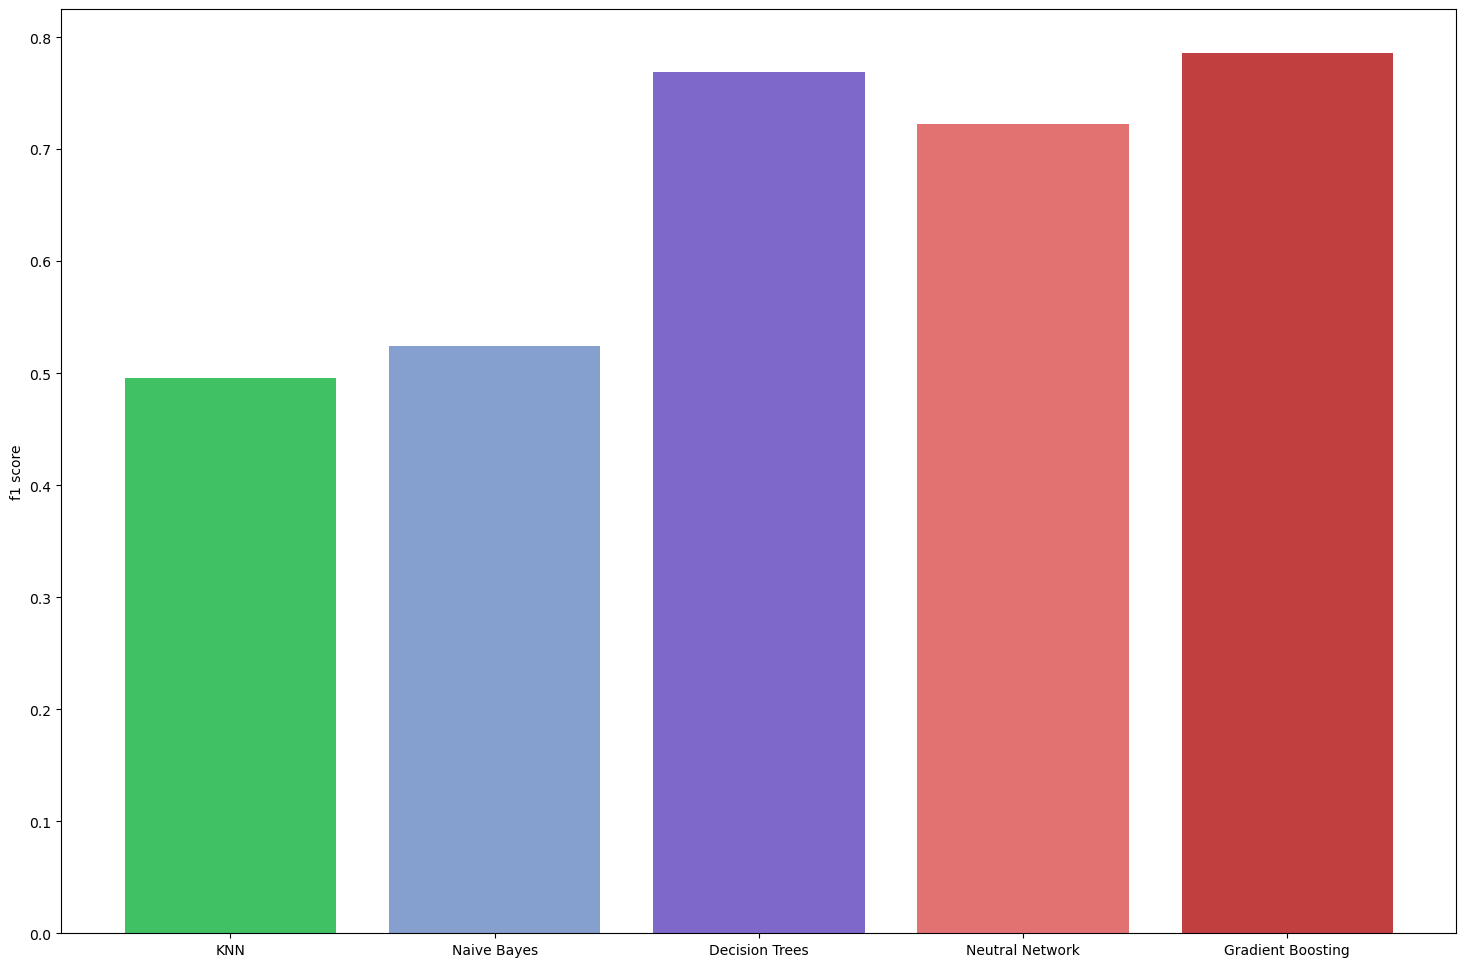

In [67]:
plt.figure(figsize=(18,12))
labels = ["KNN", "Naive Bayes","Decision Trees","Neutral Network", "Gradient Boosting"]
plt.bar(x = labels, height = [score[1] for score in BaseLineScores], color=["#3fc164","#859fcf","#7e69cb","#e27171","#c13f3f"])
plt.ylabel("f1 score")
plt.show()

## Generating pipelines

In [40]:

#Generating pipeline tuple lists
modelPipelines = [("model",b) for b in models]
Feature_selectionPipelines = [("featureSelection",select_k_best()),("varianceThreshold",VarianceThreshold())] 
scalerPipelines = [("scaler",b) for b in scalers]

#Generating all possible permutations, including ones where we use both preprocessing methods and ones where we use one or the other.
pipelines=[[("varianceThreshold", VarianceThreshold()),("featureSelection", select_k_best()),scaler,model] for model in modelPipelines for scaler in scalerPipelines]
pipelines = pipelines + [[feat, scaler, model] for model in modelPipelines for scaler in scalerPipelines for feat in Feature_selectionPipelines]


## Heavy Lifting
#### The main loop for determining the best classification model to be chosen. The loop will preform the following - 
1.  Generating the hyper-parameters dictionary for each permutation
2.  Create the KFolds object template to determine the folds within the train test to use for validation
3.  Create the GridSearch object and use it to determine the best permutation using the grid search techinque with the generated hyper-parameters and folds
4.  Grade each option of hyper-parameters and validation set and grade it using the F1 measurement to find the best set for the given permutation.
5.  Create the Permutation Score Table and insert each permutation with the best given set of hyper-parameters and it's final F1 score to the table.
6.  Determine the best permutation between each of the given permutations and save it in a pipeline object with the best set of hyper-parameters fitting for it.

In [41]:
BestScoreOverall = 0
BestModelOverall = None
counter = 0
PermutationScoreTable = {}

#Empty params dictionary - will be filled depending on which model is being used.
params = {}


for item in pipelines:
    
    permutationRow = {}
    counter = counter + 1 

    #Checking which model is being used
    match item[3][1] if len(item) > 3 else item[2][1]:

        case KNN():
            params = {
                "model__n_neighbors": KNN_k, 
                "model__weights": KNN_weight,
                "model__metric": KNN_metric
                }
            permutationRow["Model"] = "KNN"
        
        case NaiveBayes():
            params = {
                "model__alpha": NB_alpha,
                "model__force_alpha": NB_boolean,
                "model__fit_prior": NB_boolean
                }
            if len(item) > 3: 
                item[2] = scalerPipelines[1] 
            else: item[1] = scalerPipelines[1]

            permutationRow["Model"] = "Naive Bayes"
    
        case DecisionTree():
            params = {
                "model__criterion": DT_criterion,
                "model__max_depth": list(range(1, 15)),
                "model__min_samples_leaf": list(range(1, 15))
                }
            permutationRow["Model"] = "Decision Tree"
    
        case NeuralNetwork():
            params = {
                "model__hidden_layer_sizes": NN_hiddenLayerSizes,
                "model__activation": NN_activation
            }
            permutationRow["Model"] = "Neural Network"


        case GradientBoost():
            params = {
                "model__n_estimators": GB_nEstimators,
                "model__learning_rate": GB_learnRate,
                "model__max_depth": GB_maxDepth,
                "model__loss": GB_loss   
            }
            permutationRow["Model"] = "Gradient Boost"

    if len(item)>3 :
        params["varianceThreshold__threshold"] = thresholds
        params["featureSelection__k"] = highest_corr
    
    elif item[0][0] == "featureSelection":
        params["featureSelection__k"] = highest_corr
    
    else: params["varianceThreshold__threshold"] = thresholds
    


    KCrossValidation = KFold(n_splits=5, shuffle=True, random_state=42)
    piper = Pipeline(item)
    gridsearch = GridSearchCV(piper, params, cv = KCrossValidation, scoring= 'f1')
    gridsearch.fit(titanic_train.drop(label, axis = 1), titanic_train[label])

    
    bestParams = gridsearch.best_params_
    bestModel = gridsearch.best_estimator_
    if len(item)>3:
        permutationRow["Scaler"] = item[2][1].__class__.__name__
    else:
        permutationRow["Scaler"] = item[1][1].__class__.__name__
    
    permutationRow["Variance Threshold"] = bestParams.get("varianceThreshold__threshold", "-")
    permutationRow["Feature Selection"] = bestParams.get("featureSelection__k", "-")
    permutationRow["KNN n_neighbors"] = bestParams.get("model__n_neighbors", "-")
    permutationRow["KNN weights"] = bestParams.get("model__weights", "-")
    permutationRow["KNN metric"] = bestParams.get("model__metric", "-")
    permutationRow["NB alpha"] = bestParams.get("model__alpha", "-")
    permutationRow["NB force_alpha"] = bestParams.get("model__force_alpha", "-")
    permutationRow["NB fit_prior"] = bestParams.get("model__fit_prior", "-")
    permutationRow["DT criterion"] = bestParams.get("model__criterion", "-")
    permutationRow["DT max_depth"] = bestParams.get("model__max_depth", "-")
    permutationRow["DT min_samples_leaf"] = bestParams.get("model__min_samples_leaf", "-")
    permutationRow["NN hidden_layer_sizes"] = bestParams.get("model__hidden_layer_sizes", "-")
    permutationRow["NN activation"] = bestParams.get("model__activation", "-")
    permutationRow["NN alpha"] = bestParams.get("model__alpha", "-")
    permutationRow["NN learning_rate_init"] = bestParams.get("model__learning_rate_init", "-")
    permutationRow["GB n_estimators"] = bestParams.get("model__n_estimators", "-")
    permutationRow["GB learning_rate"] = bestParams.get("model__learning_rate", "-")
    permutationRow["GB max_depth"] = bestParams.get("model__max_depth", "-")
    permutationRow["GB loss"] = bestParams.get("model__loss", "-")


    permutationRow["Score"] = gridsearch.best_score_

    t = str(counter)
    PermutationScoreTable[ "Permutation " + t] = permutationRow
	

    if gridsearch.best_score_ > BestScoreOverall:
        BestScoreOverall = gridsearch.best_score_
        BestModelOverall = bestModel


print("Best model is: ", BestModelOverall, "\nWith score: ", BestScoreOverall)

Best model is:  Pipeline(steps=[('varianceThreshold', VarianceThreshold(threshold=0.01)),
                ('scaler', StandardScaler()),
                ('model',
                 GradientBoostingClassifier(learning_rate=0.01,
                                            loss='exponential', max_depth=5,
                                            n_estimators=400))]) 
With score:  0.7764728383775552


## Permutations score table
#### Description of each permutation, the best hyper-parameters set for said permutation, and it's score

In [55]:
df = pd.DataFrame(PermutationScoreTable)
df = df.T
df.sort_values(by = "Score", inplace = True, ascending = False)
df

,Model,Variance Threshold,Feature Selection,Scaler,KNN n_neighbors,KNN weights,KNN metric,NB alpha,NB force_alpha,NB fit_prior,...,DT min_samples_leaf,NN hidden_layer_sizes,NN activation,NN alpha,NN learning_rate_init,GB n_estimators,GB learning_rate,GB max_depth,GB loss,Score
Permutation 24,Gradient Boost,0.01,-,MinMaxScaler,-,-,-,-,-,-,...,-,-,-,-,-,400,0.01,5,exponential,0.776473
Permutation 7,Gradient Boost,0.01,all,StandardScaler,-,-,-,-,-,-,...,-,-,-,-,-,400,0.01,5,exponential,0.776389
Permutation 8,Gradient Boost,0.01,all,MinMaxScaler,-,-,-,-,-,-,...,-,-,-,-,-,400,0.01,5,exponential,0.774196
Permutation 23,Gradient Boost,-,all,StandardScaler,-,-,-,-,-,-,...,-,-,-,-,-,400,0.01,5,exponential,0.774036
Permutation 26,Gradient Boost,0.1,-,MinMaxScaler,-,-,-,-,-,-,...,-,-,-,-,-,400,0.01,5,exponential,0.77261
Permutation 25,Gradient Boost,-,all,StandardScaler,-,-,-,-,-,-,...,-,-,-,-,-,400,0.01,5,exponential,0.77176
Permutation 19,Decision Tree,-,4,StandardScaler,-,-,-,-,-,-,...,5,-,-,-,-,-,-,7,-,0.756432
Permutation 5,Decision Tree,0.001,4,StandardScaler,-,-,-,-,-,-,...,5,-,-,-,-,-,-,7,-,0.756432
Permutation 6,Decision Tree,0.1,4,MinMaxScaler,-,-,-,-,-,-,...,5,-,-,-,-,-,-,7,-,0.756432
Permutation 21,Decision Tree,-,4,StandardScaler,-,-,-,-,-,-,...,5,-,-,-,-,-,-,7,-,0.756432


## The best classification model is - Gradient Boosting
#### With the following paremeters

In [47]:
BestModelOverall

Pipeline(steps=[('varianceThreshold', VarianceThreshold(threshold=0.01)),
                ('scaler', StandardScaler()),
                ('model',
                 GradientBoostingClassifier(learning_rate=0.01,
                                            loss='exponential', max_depth=5,
                                            n_estimators=400))])

## Compare classification model's preformence to their baseline

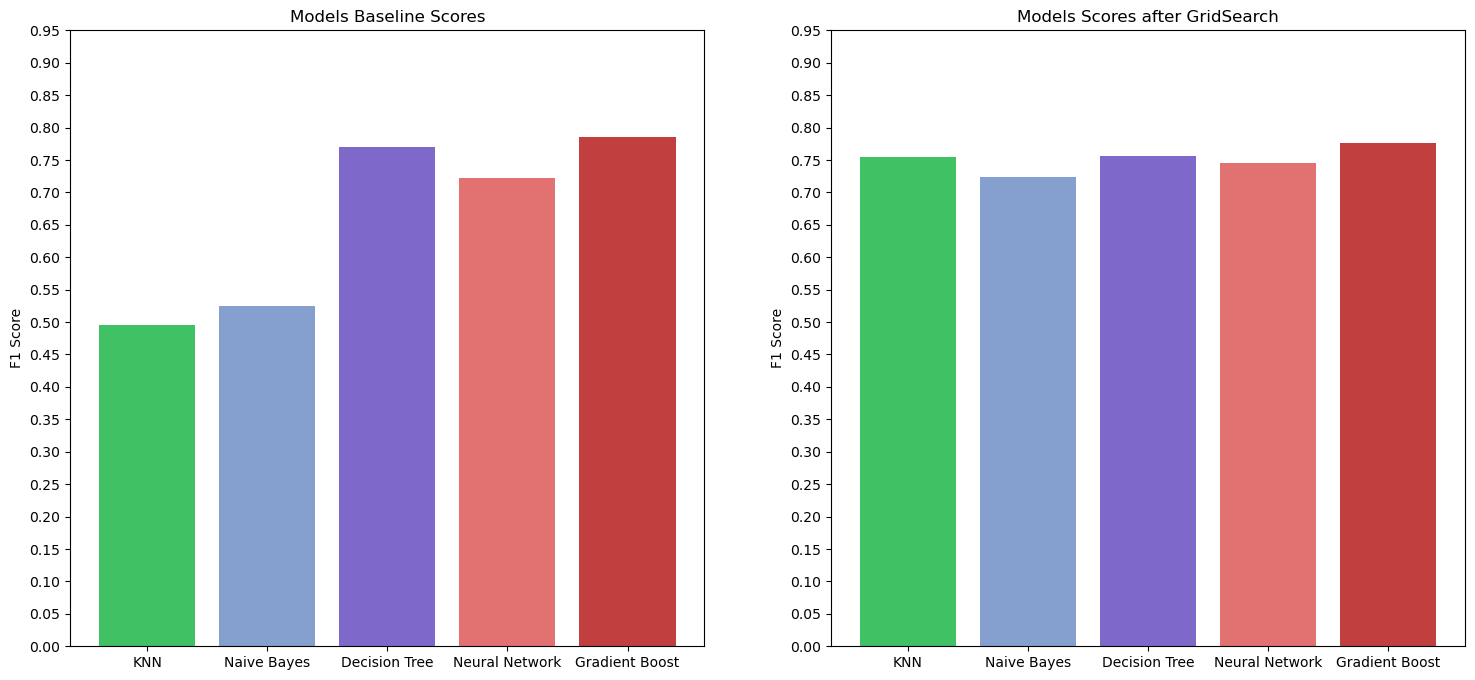

In [89]:
fig, ax = plt.subplots(1,2, figsize = (18,8))
labels = ["KNN", "Naive Bayes", "Decision Tree", "Neural Network", "Gradient Boost"]



GradientBoost_BestModel_score = PermutationScoreTable["Permutation 24"]["Score"]
DecisionTree_BestModel_score = PermutationScoreTable["Permutation 19"]["Score"]
KNN_BestModel_score = PermutationScoreTable["Permutation 1"]["Score"]
NeuralNetwork_BestModel_score = PermutationScoreTable["Permutation 9"]["Score"]
NaiveBayes_BestModel_score = PermutationScoreTable["Permutation 17"]["Score"]

ax[0].bar(x = labels, height = [score[1] for score in BaseLineScores], color=["#3fc164","#859fcf","#7e69cb","#e27171","#c13f3f"])
ax[0].set_ylabel("F1 Score")
ax[0].set_title("Models Baseline Scores")
ax[0].set_yticks(np.arange(0,1,0.05))


ax[1].bar(x = labels, height = [KNN_BestModel_score, NaiveBayes_BestModel_score, DecisionTree_BestModel_score, NeuralNetwork_BestModel_score, GradientBoost_BestModel_score], color=["#3fc164","#859fcf","#7e69cb","#e27171","#c13f3f"])
ax[1].set_ylabel("F1 Score")
ax[1].set_title("Models Scores after GridSearch")
ax[1].set_yticks(np.arange(0,1,0.05))

plt.show()

## Part 4 - Apply on test and show model performance estimation

### Applying the best model on the original training set

In [45]:
BestModelOverall.fit(titanic_train.drop(label, axis = 1), titanic_train[label])
y_predict = BestModelOverall.predict(titanic_test.drop(label, axis = 1))



## Model Evaluation
### F1 score and confusion matrix

In [46]:
cm = confusion_matrix(titanic_test[label], y_predict)
best_f1 = f1_score(titanic_test[label], y_predict)

cm_df = pd.DataFrame(cm)
cm_df.index = cm_df.columns = ["True", "False"]
print("The selected model achieved a score of: ", best_f1)
cm_df

The selected model achieved a score of:  0.7927927927927928


,True,False
True,112,6
False,17,44


### Classification report

In [47]:
report = classification_report(titanic_test[label], y_predict,output_dict=True)
df_report=pd.DataFrame(report)
df_report.transpose()

,precision,recall,f1-score,support
0,0.868217,0.949153,0.906883,118.000000
1,0.880000,0.721311,0.792793,61.000000
accuracy,0.871508,0.871508,0.871508,0.871508
macro avg,0.874109,0.835232,0.849838,179.000000
weighted avg,0.872232,0.871508,0.868003,179.000000


### Original data side by side with model prediction

In [49]:
pred_df = titanic_test.copy()
pred_df["Model Prediction"] = y_predict
pred_df.head(20)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,Model Prediction
0,3,1,35.000000,0,0,7.0500,0,0,0
1,3,1,30.000000,0,0,7.2500,0,0,0
2,3,1,29.699118,0,0,14.5000,0,0,0
3,3,0,21.000000,0,0,7.7500,2,0,1
4,3,1,32.000000,0,0,56.4958,0,1,1
5,1,1,17.000000,0,2,110.8833,1,1,0
6,3,0,21.000000,1,0,9.8250,0,0,0
7,3,1,9.000000,5,2,46.9000,0,0,0
8,1,0,52.000000,1,0,78.2667,1,1,1
9,3,1,29.699118,8,2,69.5500,0,0,0
